In [1]:
from keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from keras.preprocessing import image
from keras.models import Model
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import keras
import numpy as np
import csv
import pickle
from keras.preprocessing import image
from sklearn.ensemble import RandomForestRegressor


model = ResNet50(include_top = False, weights='imagenet')
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.layers.pop()

not_found = 0
X = []
Y = []
train_data_paths = 'head'
images = []
base_model_img_size = 224
with open(train_data_paths, 'r') as file_:
    csv_reader = csv.reader(file_, delimiter = ":")
    for row in csv_reader:
        pmi = int(row[1].strip())
        img = image.load_img(row[0].strip(),
                target_size = (base_model_img_size,
                 base_model_img_size, 3), grayscale = False)
        images.append(img)

        img = image.img_to_array(img)
        img = img/255
        X.append(img)
        Y.append(pmi)

X = np.array(X)
Y = np.array(Y)
loaded_model = pickle.load(open('RFreg_modelSeed42PT_FT_0.999T_0.916V', 'rb'))


Using TensorFlow backend.


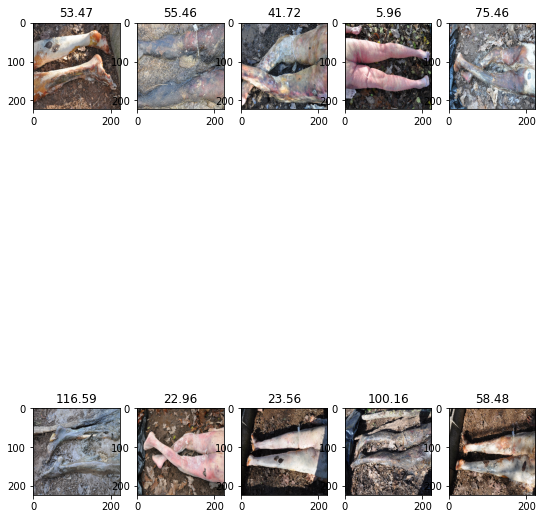

In [19]:
import numpy as np
import matplotlib.pyplot as plt

pred = [ 53.47,  55.46,  41.72,   5.96,  75.46, 116.59,  22.96,  23.56, 100.16,  58.48]

fig = plt.figure(figsize=(9, 13))
columns = 5
rows = 2
ax = []
for i in range(0, columns*rows):
    ax.append(fig.add_subplot(rows, columns, i + 1))
    ax[-1].set_title(str(pred[i]))
    plt.imshow(images[i])
plt.show()